True
[[[ 65  66  50]
  [ 64  66  50]
  [ 64  66  51]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]

 [[ 60  62  46]
  [ 60  62  46]
  [ 59  60  45]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]

 [[ 56  58  43]
  [ 56  57  42]
  [ 56  55  41]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]

 ...

 [[ 79  80  66]
  [ 80  82  67]
  [ 80  80  66]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]

 [[ 80  78  64]
  [ 80  78  64]
  [ 80  78  64]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]

 [[ 80  75  62]
  [ 80  76  62]
  [ 80  76  62]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]]


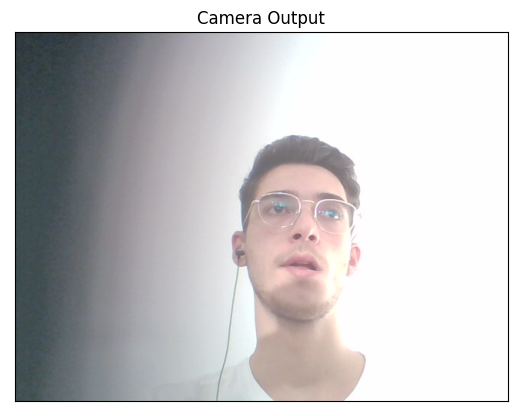

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#connecting to camera

cap = cv2.VideoCapture(0)

#checking if camera is connected or not

if cap.isOpened():
    ret,frame = cap.read()
    print(ret)
    print(frame)
else:
    ret = False

#reading and showing the image

img1 = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

#output

plt.imshow(img1)
plt.title('Camera Output')
plt.xticks([])
plt.yticks([])
plt.show()

#

In [15]:
import cv2
cap = cv2.VideoCapture(0)

width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
while True:
    ret,frame = cap.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray) #or frame if you want to see color image
    if cv2.waitKey(1) & 0xFF == ord('q'):#clicca q per uscire
        break
cap.release()

cv2.destroyAllWindows()

In [36]:
import cv2

writer = cv2.VideoCapture('video.mp4')

if writer.isOpened() == False:
    print("Error opening video stream or file")

while writer.isOpened():
    ret, frame = writer.read()
    if ret == True:
        cv2.imshow('Frame', frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break

writer.release()
cv2.destroyAllWindows()

Error opening video stream or file


In [39]:
# Read image
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#remove background from image

img = cv2.imread('duck.png')
hh, ww = img.shape[:2]

# threshold on white
# Define lower and uppper limits
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# invert morp image
mask = 255 - morph

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)


# save results
cv2.imwrite('duck.png', thresh)
cv2.imwrite('duck.png', morph)
cv2.imwrite('duck.png', mask)
cv2.imwrite('duck.png', result)

cv2.imshow('thresh', thresh)
cv2.imshow('morph', morph)
cv2.imshow('mask', mask)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

(652, 307, 3)


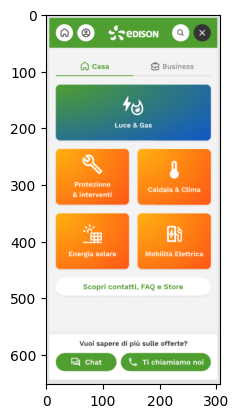

In [379]:
#object detection in image

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


img = cv2.imread('figma_completo.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#reshape dimension  img



print(img.shape)


plt.imshow(img)

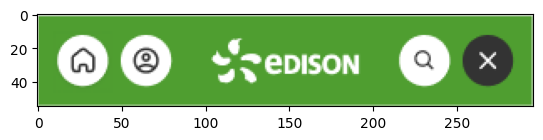

In [380]:
face= cv2.imread('nav.png')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)


In [381]:
face.shape


(55, 296, 3)

In [93]:
sum([1,2,3])

6

In [77]:
mystring='hello'
mystring


'hello'

In [376]:
eval('sum')
myfunc = eval('sum')
myfunc([1,20,3])

24

In [377]:
methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

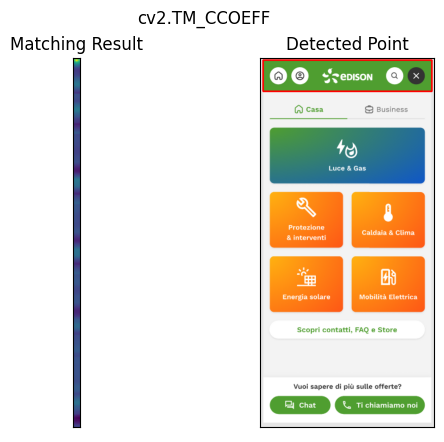

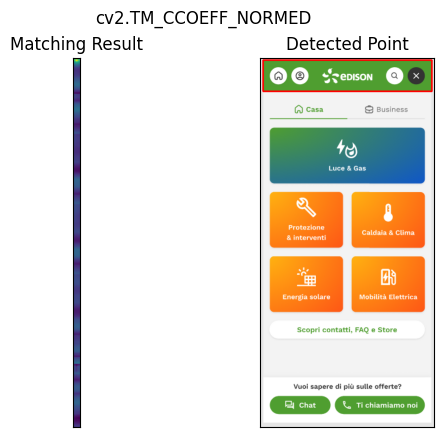

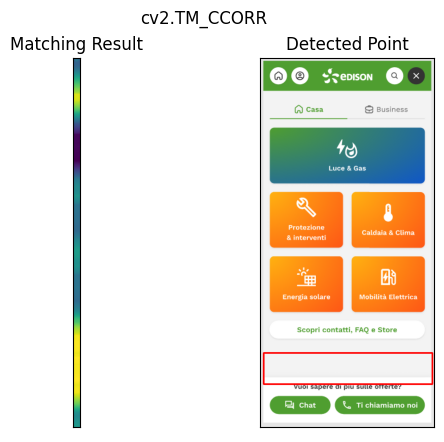

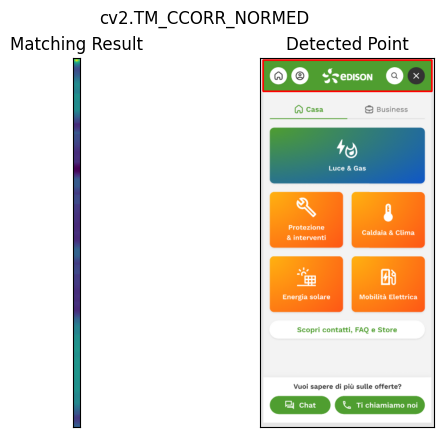

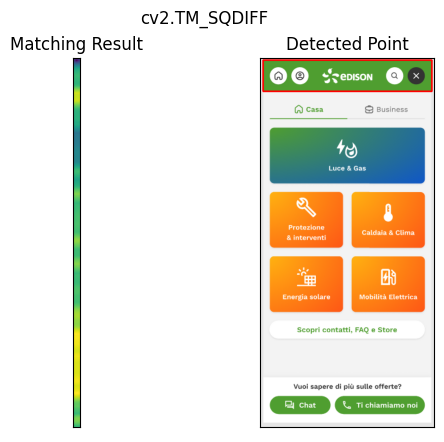

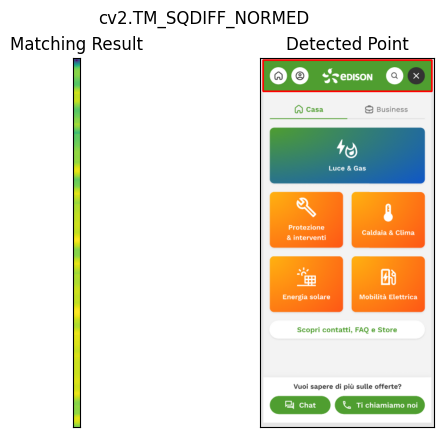

In [382]:
for m in methods:
    img_copy = img.copy()

    method = eval(m)
# Apply template Matching
    res = cv2.matchTemplate(img_copy,face,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    height, width, channels = face.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(img_copy,top_left, bottom_right, 255, 2)

    plt.subplot(121)
    plt.imshow(res) 
    plt.title('Matching Result')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(img_copy)
    plt.title('Detected Point')
    plt.xticks([])
    plt.yticks([])
    plt.suptitle(m)
    plt.show()

    

In [25]:
#corner detection

import cv2
import numpy as np

img = cv2.imread('figma_completo.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.01)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()



In [4]:
corner= cv2.goodFeaturesToTrack(gray,25,0.01,10)
corner = np.int0(corner)

for i in corner:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

cv2.imshow('dst',img)

if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()



In [11]:
import cv2
import numpy as np
 
img = cv2.imread('figma_completo.png')
print(img.shape) # Print image shape
cv2.imshow("original", img)
 
# Cropping an image
cropped_image = img[0:70, 0:330]
 
# Display cropped image
cv2.imshow("cropped", cropped_image)
 
# Save the cropped image
cv2.imwrite("Cropped Image.jpg", cropped_image)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

(652, 307, 3)


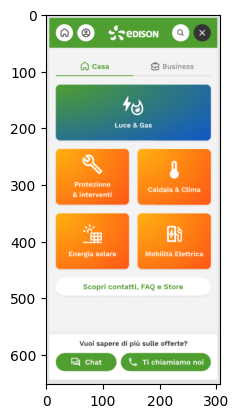

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('figma_completo.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [399]:
#contour detection

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('figma3.png',0)

img.shape



(500, 483)

0 255


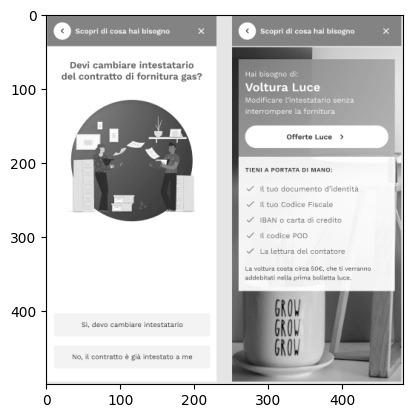

In [400]:
plt.imshow(img,cmap='gray')
print(img.min(),img.max())

(500, 483)


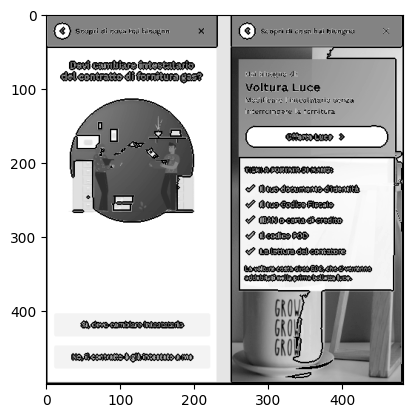

In [449]:
ret, thresh = cv2.threshold(img, 200, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours, -1, (0,255,0), 1)

plt.imshow(img,cmap='gray')
print(img.shape)

In [450]:
mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, contours, 1, 255, -1) # Draw filled contour in mask
out = np.zeros_like(img) # Extract out the object and place into output image
out[mask == 255] = img[mask == 255]

# Show the output image
cv2.imshow('Output', out)
cv2.waitKey(0)
cv2.destroyAllWindows()

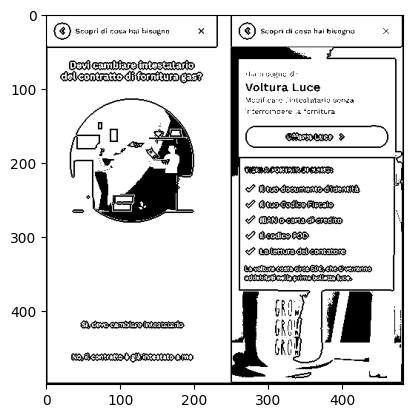

In [451]:
gray = cv2.blur(img, (1, 1))
thresh = cv2.threshold(gray, 80, 250, cv2.THRESH_BINARY)[1]
plt.imshow(thresh,cmap='gray')

In [454]:




import cv2
import os, shutil
image= cv2.imread('figma2.png')
original_image= image

gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edges= cv2.Canny(gray, 0,0)

contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)

#crea una catella per i risultati
# if os.path.exists('results'):
#     shutil.rmtree('results')
# os.mkdir('results')

for (i,c) in enumerate(sorted_contours):
    x,y,w,h= cv2.boundingRect(c)

    if w>9 and h>9:
        cropped_contour= original_image[y:y+h, x:x+w]
        cv2.imwrite('results/contour_{}.png'.format(i), cropped_contour)



In [397]:
#text extraction

from PIL import Image
from pytesseract import pytesseract


pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

img = Image.open('results/contour_3.png')
#resieze image
# img = img.resize((2000, 1950))

text = pytesseract.image_to_string(img)
print(text)



Si, devo cambiareintestatario

